In [1]:
import requests

url = "https://m.land.naver.com/cluster/ajax/complexList"

querystring = {"itemId":"2122111331","mapKey":"","lgeo":"2122111331","rletTpCd":"APT","tradTpCd":"A1%3AB1","z":"9","lat":"37.5486782","lon":"127.1507812","btm":"37.5289563","lft":"127.0639526","top":"37.5683364","rgt":"127.2376561","cortarNo":"1174010100","isOnlyIsale":"false"}

headers = {
    'User-Agent': "PostmanRuntime/7.19.0",
    'Accept': "*/*",
    'Cache-Control': "no-cache",
    'Postman-Token': "79328ce1-52ea-4b4e-9ee8-8267e991b0b2,211f57bc-47ff-4e38-a1a7-d37ed2fd2a2a",
    'Host': "m.land.naver.com",
    'Accept-Encoding': "gzip, deflate",
    'Connection': "keep-alive",
    'cache-control': "no-cache"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [2]:
import json
data = json.loads(response.text)

In [3]:
items = data["result"]

In [4]:
items[0]

NameError: name 'items' is not defined

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(items)

In [ ]:
df.head(10)

In [ ]:
len(df)

# api 호출을 함수화

In [26]:
import requests
import json
import pandas as pd

url = "https://m.land.naver.com/complex/getComplexArticleList"

headers = {
    'User-Agent': "PostmanRuntime/7.19.0",
    'Accept': "*/*",
    'Cache-Control': "no-cache",
    'Postman-Token': "aa3ee044-d611-4ffd-8132-b2069e9bfe25,3a97975f-95f4-4948-ada5-561941c6007d",
    'Host': "m.land.naver.com",
    'Accept-Encoding': "gzip, deflate",
    'Connection': "keep-alive",
    'cache-control': "no-cache"
    }

# querystring = {"hscpNo":"1308","tradTpCd":"B1","order":"point_","showR0":"N","page":"1"}

def get_for_sales(hscpNo, tradTpCd, page=1):
    querystring = {"hscpNo":hscpNo,"tradTpCd":tradTpCd,"order":"point_","showR0":"N","page":page}
    print("get_for_sales", querystring)
    
    response = requests.request("GET", url, headers=headers, params=querystring)
    
    data = json.loads(response.text)
    df = pd.DataFrame.from_dict(data["result"]["list"])
    
    return df

In [27]:
df = get_for_sales(1308, "A1:B1:C1", 1)

get_for_sales {'page': 1, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}


In [28]:
df.head(10)

,atclFetrDesc,atclNm,atclNo,atclStatCd,bildNm,cfmYmd,cpCnt,cpLinkVO,cpNm,cpid,...,spc1,spc2,tagList,tradCmplYn,tradTpCd,tradTpNm,tradePriceHan,tradePriceInfo,tradeRentPrice,vrfcTpCd
0,"깨끗, 3월입주 전세입니다",삼익그린맨션2차,1928986484,R0,602동,19.11.28,1,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",부동산뱅크,NEONET,...,59.93,42.93,"[25년이상, 융자금없는, 역세권, 대단지]",N,B1,전세,,,0,MOBL
1,고덕역세권에 올수리된 전세물건으로 보시면 마음에 드실겁니다.,삼익그린맨션2차,1929168505,R0,501동,19.11.29,1,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",부동산뱅크,NEONET,...,90.97,66.87,"[25년이상, 융자금없는, 올수리, 역세권]",N,B1,전세,,,0,OWNER
2,올수리,삼익그린맨션2차,1929099357,R0,502동,19.11.29,3,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",부동산써브,SERVE,...,100.73,84.75,"[25년이상, 융자금없는, 올수리, 역세권]",N,B1,전세,,,0,OWNER
3,대지지분 넓은 입주가능한 환경좋은 역세권 대단지 아파트입니다.,삼익그린맨션2차,1928966095,R0,608동,19.11.27,2,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",매경부동산,bizmk,...,125.37,107.56,"[25년이상, 역세권, 대단지, 방네개이상]",N,A1,매매,,,0,OWNER
4,주인 확장올수리 정상 환경좋은 역세권 대단지 아파트입니다,삼익그린맨션2차,1928960430,R0,601동,19.11.27,1,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",매경부동산,bizmk,...,90.97,66.87,"[25년이상, 융자금없는, 올수리, 역세권]",N,B1,전세,,,0,OWNER
5,"특올수리,남향 밝고 기분 좋은 전세 물건입니다",삼익그린맨션2차,1928625421,R0,602동,19.11.23,1,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",부동산뱅크,NEONET,...,76.44,54.81,"[25년이상, 융자금없는, 올수리, 역세권]",N,B1,전세,,,0,OWNER
6,전망 올수리 정상 환경좋은 역세권 대단지 아파트입니다.,삼익그린맨션2차,1928602233,R0,303동,19.11.22,3,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",매경부동산,bizmk,...,125.37,107.56,"[25년이상, 융자금없는, 올수리, 역세권]",N,B1,전세,,,0,OWNER
7,"급전세, 정남향 수리깨끗한 집, 교통학군우수 대단지",삼익그린맨션2차,1929156516,R0,602동,19.11.29,3,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",부동산써브,SERVE,...,76.44,54.81,"[25년이상, 융자금없는, 역세권, 대단지]",N,B1,전세,,,0,TEL
8,"올수리, 귀한 전세입니다",삼익그린맨션2차,1929135700,R0,501동,19.11.29,1,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",부동산뱅크,NEONET,...,90.97,66.87,"[25년이상, 융자금없는, 올수리, 역세권]",N,B1,전세,,,0,TEL
9,NaN,삼익그린맨션2차,1929023057,R0,501동,19.11.28,1,"{'pcArticleLinkUseAtArticleTitle': False, 'mob...",매경부동산,bizmk,...,90.97,66.87,"[25년이상, 융자금없는, 역세권, 대단지]",N,B1,전세,,,0,TEL


In [30]:
import time

frames = []
page = 1
while(True):
    df = get_for_sales(1308, "A1:B1:C1", page)
    size = len(df)
    frames.append(df)
    page += 1
    if size != 20:
        break;
    time.sleep(1)

get_for_sales {'page': 1, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}
get_for_sales {'page': 2, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}
get_for_sales {'page': 3, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}
get_for_sales {'page': 4, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}
get_for_sales {'page': 5, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}
get_for_sales {'page': 6, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}
get_for_sales {'page': 7, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}
get_for_sales {'page': 8, 'hscpNo': 1308, 'showR0': 'N', 'tradTpCd': 'A1:B1:C1', 'order': 'point_'}


## dataframe 합치기

In [31]:
len(frames)

8

In [32]:
df = pd.concat(frames)
len(df)

d:\repo\data-analysis-note\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


141

In [33]:
df['atclFetrDesc']

0                         깨끗, 3월입주 전세입니다
1      고덕역세권에 올수리된 전세물건으로 보시면 마음에 드실겁니다.
2                                    올수리
3     대지지분 넓은 입주가능한 환경좋은 역세권 대단지 아파트입니다.
4        주인 확장올수리 정상 환경좋은 역세권 대단지 아파트입니다
                     ...                
16            올수리된 하시 입주 가능한 로얄층 밝은 집입니다
17               정남,수리된 밝고 기분좋은 전세 물건입니다
18                      싼전세 빠른입주가능 8월올수리
19                                   NaN
0                                    NaN
Name: atclFetrDesc, Length: 141, dtype: object

In [34]:
import re

pattern = re.compile(r"[;, ]")
desc = df["atclFetrDesc"].dropna().map(lambda x: pattern.split(x))

desc

0                            [깨끗, , 3월입주, 전세입니다]
1       [고덕역세권에, 올수리된, 전세물건으로, 보시면, 마음에, 드실겁니다.]
2                                          [올수리]
3     [대지지분, 넓은, 입주가능한, 환경좋은, 역세권, 대단지, 아파트입니다.]
4        [주인, 확장올수리, 정상, 환경좋은, 역세권, 대단지, 아파트입니다]
                         ...                    
14                              [올수리, , 귀한매물입니다]
15                       [깨끗, , 남향, , 귀한, 전세입니다]
16            [올수리된, 하시, 입주, 가능한, 로얄층, 밝은, 집입니다]
17                [정남, 수리된, 밝고, 기분좋은, 전세, 물건입니다]
18                          [싼전세, 빠른입주가능, 8월올수리]
Name: atclFetrDesc, Length: 123, dtype: object

In [35]:
import itertools
word_list = [i for i in itertools.chain.from_iterable(desc.tolist())]
word_list[0]

'깨끗'

## word count

In [36]:
from collections import Counter
word_dict = Counter(word_list)

## wordcloud 사용

In [40]:
from wordcloud import WordCloud

stopwords = {"", " "}

fontname = "NanumGothic.ttf"

wordcloud = WordCloud(width=800,
                      height=800,
                      stopwords=stopwords,
                      font_path = fontname,
                      background_color="black")

wordcloud = wordcloud.generate_from_frequencies(word_dict)

## wordcloud를 이미지화

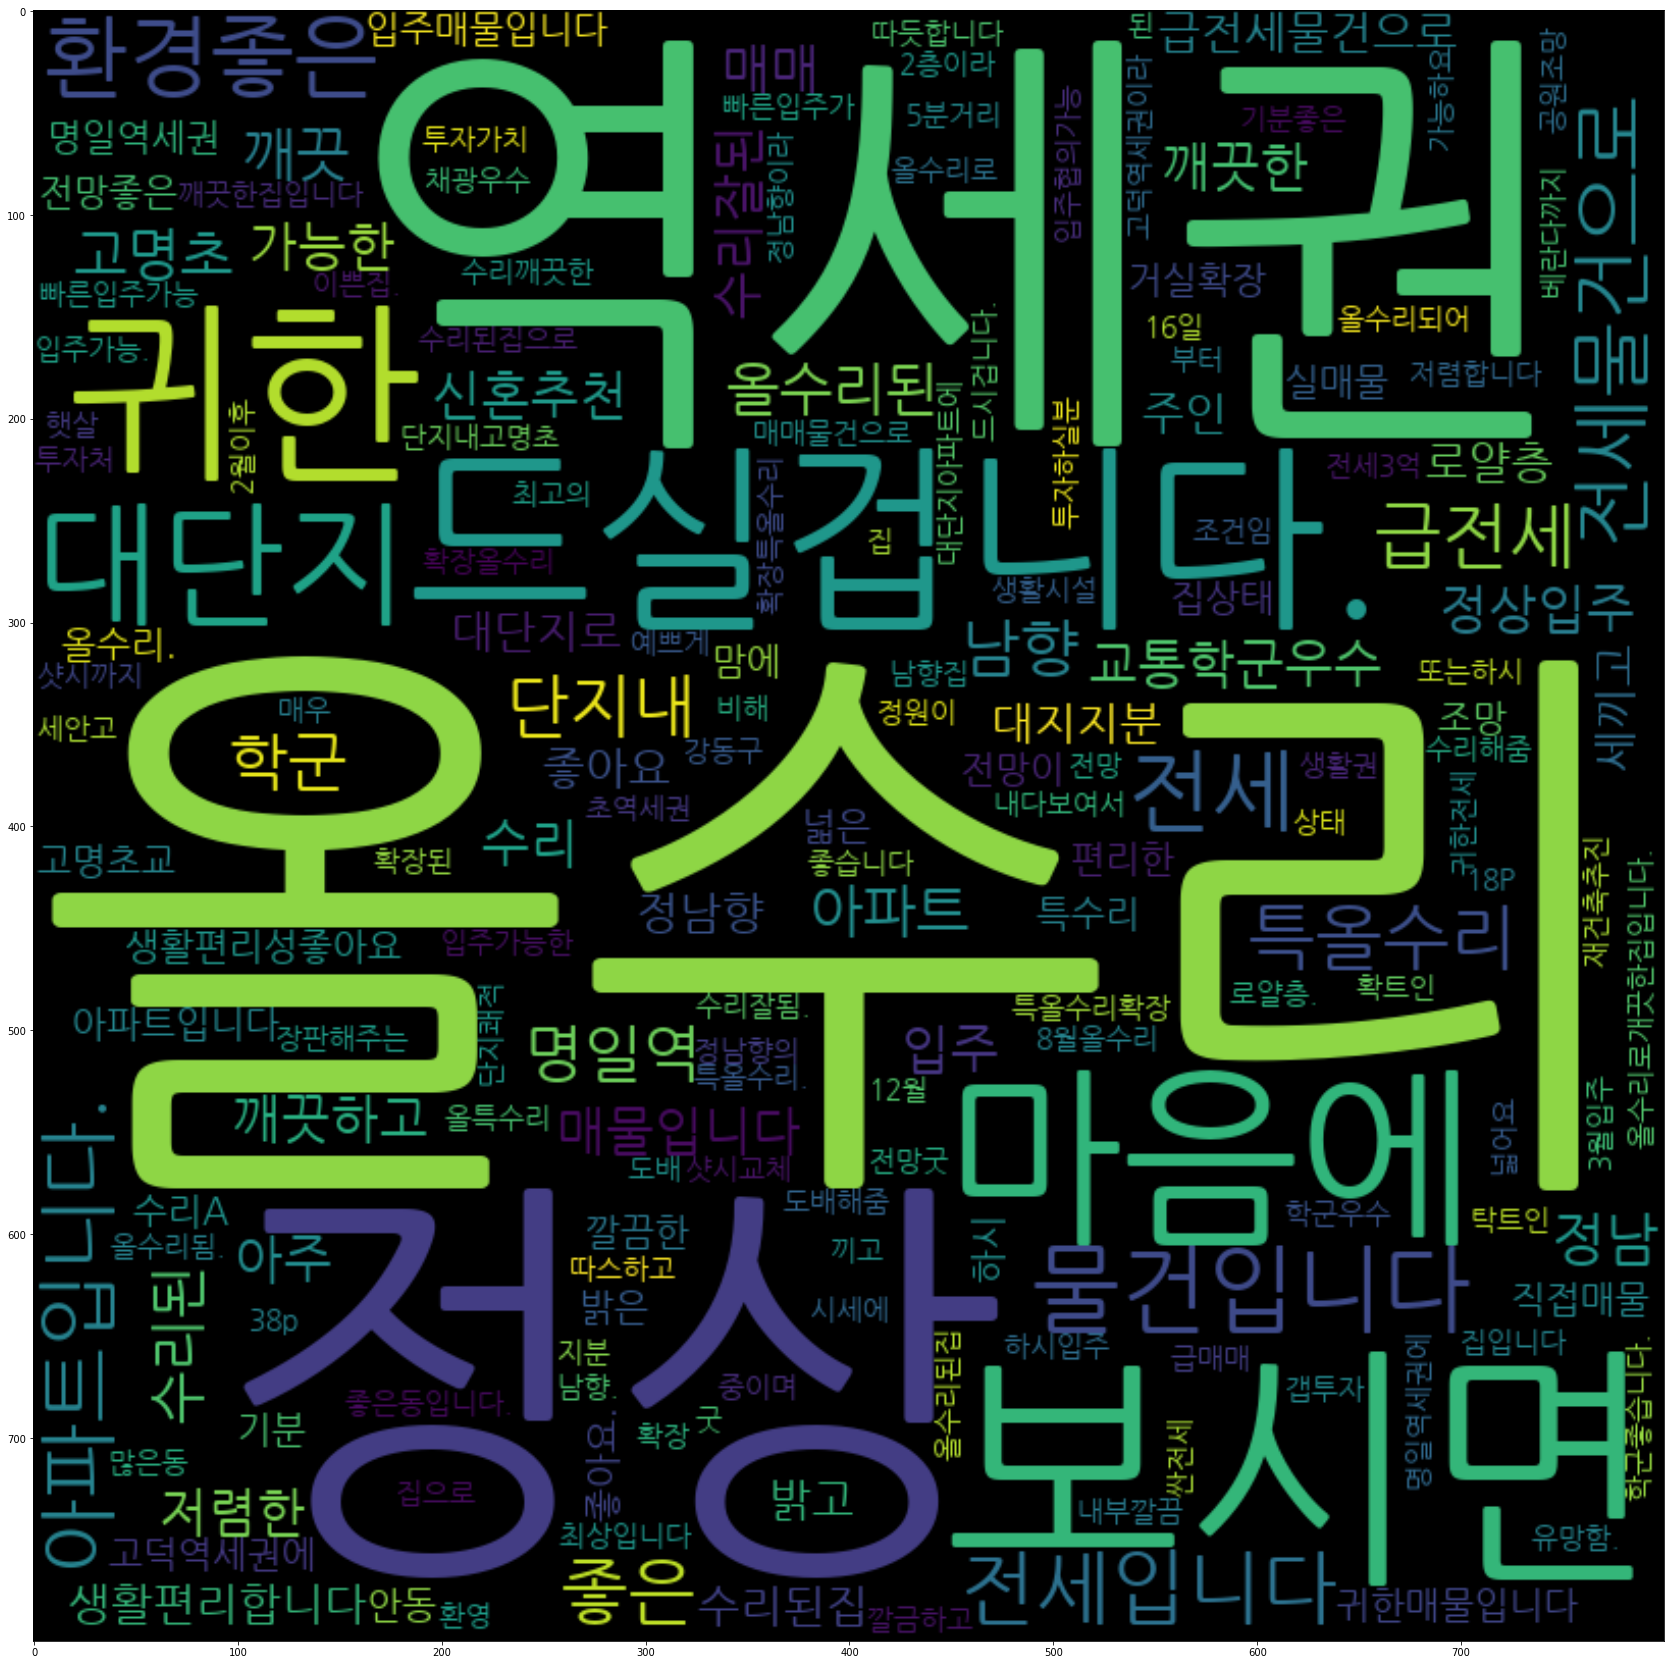

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

array = wordcloud.to_array()

fig = plt.figure(figsize=(30, 30))
plt.imshow(array, interpolation="bilinear")
plt.show()